# More Pandas

![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

Suppose you were interested in opening an animal shelter. To inform your planning, it would be useful to analyze data from other shelters to understand their operations. In this lecture, we'll analyze animal outcome data from the Austin Animal Center.  

## Objectives

- Apply and use `.map()`, `apply()`, and `.applymap()` from the `pandas` library
- Apply and use `.where()` and `.select()` from the `numpy` library
- Use lambda functions in coordination with the above functions
- Explain what a groupby object is and split a DataFrame using `.groupby()`

In [62]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

%matplotlib inline

# These next lines ensure that the notebook
# stays current with respect to active .py files.
# See here:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Data

Let's take a moment to download and to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

We can also ingest the data right off the web, as we do below. The code below will load data for the last 1000 animals to leave the center. 

In [63]:
url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
response = requests.get(url)
animals = pd.DataFrame(response.json())

# Exploratory Data Analysis (EDA)

Exploring a new dataset is essential for understanding what it contains. This will generate ideas for processing the data and questions to try to answer in futher analysis.

## Inspecting the Data

Let's take a look at a few rows of data.

In [64]:
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A611647,Cody,2021-02-05T13:53:00.000,2021-02-05T13:53:00.000,2006-10-10T00:00:00.000,Transfer,Partner,Dog,Neutered Male,14 years,Pug Mix,Black/White
1,A829074,NaN,2021-02-05T13:52:00.000,2021-02-05T13:52:00.000,2020-02-01T00:00:00.000,Transfer,Partner,Dog,Intact Male,1 year,Pug/Chihuahua Shorthair,Tan/Black
2,A821320,*Inky,2021-02-05T12:17:00.000,2021-02-05T12:17:00.000,2020-08-06T00:00:00.000,Adoption,Foster,Cat,Neutered Male,6 months,Domestic Shorthair,White/Blue
3,A828891,Yugi,2021-02-05T11:58:00.000,2021-02-05T11:58:00.000,2019-01-28T00:00:00.000,Adoption,NaN,Dog,Neutered Male,2 years,Siberian Husky/Cardigan Welsh Corgi,Cream
4,A828286,NaN,2021-02-05T10:59:00.000,2021-02-05T10:59:00.000,2020-01-12T00:00:00.000,Adoption,Foster,Dog,Spayed Female,1 year,Border Collie,Black/White


The `info()` and `describe()` provide a useful overview of the data.

In [44]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   animal_id         1000 non-null   object 
 1   name              727 non-null    object 
 2   datetime          1000 non-null   object 
 3   monthyear         1000 non-null   object 
 4   date_of_birth     1000 non-null   object 
 5   outcome_type      990 non-null    object 
 6   outcome_subtype   541 non-null    object 
 7   animal_type       1000 non-null   object 
 8   sex_upon_outcome  1000 non-null   object 
 9   age_upon_outcome  1000 non-null   object 
 10  breed             1000 non-null   object 
 11  color             1000 non-null   object 
 12  new_age1          1000 non-null   object 
 13  new_age2          1000 non-null   object 
 14  new_sex1          1000 non-null   object 
 15  new_sex2          1000 non-null   object 
 16  age_split         1000 non-null   object 
 

In [65]:
animals.describe()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
count,1000,727,1000,1000,1000,990,542,1000,1000,1000,1000,1000
unique,971,629,900,900,558,8,10,4,5,32,191,116
top,A828197,Luna,2021-01-30T17:15:00.000,2021-01-30T17:15:00.000,2020-10-26T00:00:00.000,Adoption,Foster,Dog,Neutered Male,2 years,Domestic Shorthair,Black/White
freq,3,9,6,6,13,540,243,575,413,216,211,109


In [58]:
# Use value counts to check a categorical feature's distribution

animals['color'].value_counts()

Black/White              109
Black                     75
Brown Tabby               66
Brown/White               45
White                     40
                        ... 
Chocolate Point            1
White/Liver                1
Yellow/Green               1
Red/Tan                    1
Chocolate Point/Cream      1
Name: color, Length: 117, dtype: int64

Now that we have a sense of the data available to us, we can focus in on some more specific questions to dig into. These questions may or may not be directly relevant to your goal (e.g. helping plan a new shelter), but will always help you gain a better understanding of your data.

In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.  

## Question 1: What animal types are in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

    What features do we need?
     - "animal_type"
    What type of logic and calculation do we perform?
     - Let's use `.value_counts()` to count the different animal types
    What type of visualization would help us answer the question?
     - A bar chart would be good for this purpose

In [61]:
animals['animal_type'].value_counts()

Dog      574
Cat      357
Other     60
Bird       9
Name: animal_type, dtype: int64

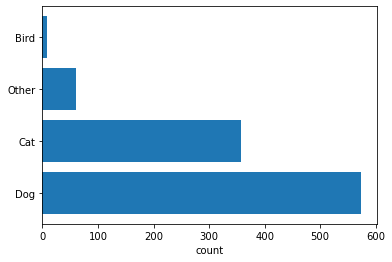

In [56]:
fig, ax = plt.subplots()

ax.barh(animals['animal_type'].value_counts().index,
        width=animals['animal_type'].value_counts().values)
ax.set_xlabel('count');

<AxesSubplot:>

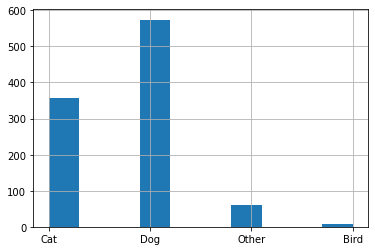

In [46]:
animals['animal_type'].hist()

Questions lead to other questions. For the above example, the visualization raises the question...

## Question 2: What "Other" animals are in the dataset?

To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.   
    
**Discussion**: Where might we look to find animal types within the Other category?

<details>
    <summary>
        Answer
    </summary>
        The breed column.
</details>

In [59]:
# Your exploration here

Let's use that column to answer our question.

In [7]:
animals[animals['animal_type'] == 'Other']['breed'].value_counts()

Hamster         16
Bat             15
Raccoon          7
Fox              6
Guinea Pig       5
Rabbit Sh        4
Skunk            3
Rex Mix          1
Coyote           1
Lizard           1
Lop-Mini Mix     1
Name: breed, dtype: int64

## Question 3: How old are the animals in our dataset?

Let's try to answer this with the `age_upon_outcome` variable to learn some new `pandas` tools.

In [12]:
animals['age_upon_outcome'].value_counts()

2 years      217
1 year       165
2 months      93
3 years       71
3 months      53
4 months      52
6 months      39
5 months      32
4 years       28
1 month       26
5 years       25
8 months      23
10 months     22
8 years       19
6 years       18
10 years      17
7 years       15
7 months      14
9 years       11
9 months       9
12 years       8
11 months      8
2 days         7
13 years       7
11 years       6
14 years       3
1 weeks        3
2 weeks        3
4 weeks        2
NULL           2
20 years       1
15 years       1
Name: age_upon_outcome, dtype: int64

### `Series.map()` and `Series.apply()`

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary - usually we'll use functions.

The `.apply()` method is similar to the `.map()` method for Series, but can only use functions. It has more powerful uses when working with DataFrames.

In [74]:
def one_year(age):
    if age == '1 year':
        return '1 years'
    else:
        return age

In [75]:
animals['new_age1'] = animals['age_upon_outcome'].map(one_year)
animals['new_age1'].value_counts()

2 years      216
1 years      166
2 months      93
3 years       71
3 months      53
4 months      52
6 months      39
5 months      31
4 years       28
1 month       26
5 years       25
8 months      23
10 months     22
8 years       19
6 years       18
10 years      17
7 years       15
7 months      14
9 years       11
9 months       9
12 years       8
11 months      8
2 days         7
13 years       7
11 years       6
14 years       4
1 weeks        3
2 weeks        3
4 weeks        2
NULL           2
20 years       1
15 years       1
Name: new_age1, dtype: int64

### Slower Than `numpy`

In general, `np.where()` and `np.select()` are faster:

In [76]:
animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year',
                              '1 years', animals['age_upon_outcome'])
animals['new_age2']

0       14 years
1        1 years
2       6 months
3        2 years
4        1 years
         ...    
995      4 years
996      1 years
997      2 years
998    10 months
999      3 years
Name: new_age2, Length: 1000, dtype: object

In [77]:
(animals['new_age1'] != animals['new_age2']).sum()

0

In [78]:
%timeit animals['new_age1'] = animals['age_upon_outcome'].map(one_year)

4.12 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%timeit animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year', \
                              '1 years', animals['age_upon_outcome'])

The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
2.48 ms ± 954 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### More Sophisticated Mapping

Let's use `.map()` to turn sex_upon_outcome into a category with three values (called **ternary**): male, female, or unknown. 

First, explore the unique values:

In [21]:
animals['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Unknown',
       'Intact Female'], dtype=object)

In [22]:
def sex_mapper(status):
    if status in ['Neutered Male', 'Intact Male']:
        return 'Male'
    elif status in ['Spayed Female', 'Intact Female']:
        return 'Female'
    else:
        return 'Unknown'

In [23]:
animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)
animals['new_sex1']

0         Male
1         Male
2       Female
3         Male
4         Male
        ...   
995    Unknown
996       Male
997     Female
998       Male
999     Female
Name: new_sex1, Length: 1000, dtype: object

Again, `numpy` will be faster:

In [24]:
conditions = [animals['sex_upon_outcome'] == 'Neutered Male',
             animals['sex_upon_outcome'] == 'Intact Male',
             animals['sex_upon_outcome'] == 'Spayed Female',
             animals['sex_upon_outcome'] == 'Intact Female',
             animals['sex_upon_outcome'] == 'Unknown',
             animals['sex_upon_outcome'] == 'NULL']

choices = ['Male', 'Male', 'Female', 'Female', 'Unknown', 'Unknown']

In [25]:
animals['new_sex2'] = np.select(conditions, choices)
animals['new_sex2']

0         Male
1         Male
2       Female
3         Male
4         Male
        ...   
995    Unknown
996       Male
997     Female
998       Male
999     Female
Name: new_sex2, Length: 1000, dtype: object

In [26]:
(animals['new_sex1'] != animals['new_sex2']).sum()

0

In [27]:
%timeit animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)

The slowest run took 5.46 times longer than the fastest. This could mean that an intermediate result is being cached.
3.05 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit animals['new_sex2'] = np.select(conditions, choices)

2.71 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Lambda Functions

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [29]:
animals[animals['animal_type'] == 'Other']

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_age2,new_sex1,new_sex2
7,A829221,NaN,2021-02-05T08:24:00.000,2021-02-05T08:24:00.000,2019-02-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown/Brown,NULL,NULL,Unknown,Unknown
8,A829212,NaN,2021-02-05T08:03:00.000,2021-02-05T08:03:00.000,2019-02-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,2 years,2 years,Unknown,Unknown
34,A829194,NaN,2021-02-04T10:51:00.000,2021-02-04T10:51:00.000,2020-02-04T00:00:00.000,Disposal,NaN,Other,Unknown,1 year,Bat,Black,1 year,1 year,Unknown,Unknown
61,A829138,NaN,2021-02-03T08:46:00.000,2021-02-03T08:46:00.000,2020-02-02T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat,Brown,1 year,1 year,Unknown,Unknown
75,A828912,NaN,2021-02-02T13:17:00.000,2021-02-02T13:17:00.000,2019-01-28T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,2 years,2 years,Unknown,Unknown
118,A828913,NaN,2021-01-31T09:20:00.000,2021-01-31T09:20:00.000,2019-01-28T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,2 years,2 years,Unknown,Unknown
129,A828640,Blossom,2021-01-30T16:35:00.000,2021-01-30T16:35:00.000,2020-06-22T00:00:00.000,Adoption,Foster,Other,Unknown,7 months,Lop-Mini Mix,Sable,7 months,7 months,Unknown,Unknown
169,A828945,NaN,2021-01-29T14:37:00.000,2021-01-29T14:37:00.000,2020-08-29T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,5 months,Skunk,Black/White,5 months,5 months,Unknown,Unknown
188,A828742,NaN,2021-01-28T14:57:00.000,2021-01-28T14:57:00.000,2019-01-26T00:00:00.000,Transfer,Partner,Other,Intact Male,2 years,Lizard,Brown,2 years,2 years,Male,Male
206,A828889,NaN,2021-01-28T10:36:00.000,2021-01-28T10:36:00.000,2020-01-28T00:00:00.000,Euthanasia,Suffering,Other,Unknown,1 year,Raccoon,Black/Gray,1 year,1 year,Unknown,Unknown


In [84]:
animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x).value_counts()

Dog     575
Cat     356
Bird      9
Name: animal_type, dtype: int64

## Methods for Re-Organizing DataFrames: `.groupby()`

If you have ever learned SQL, you may have seen the GROUP BY command. (And if you haven't, you'll learn it very soon!). Pandas has a method that works similarly.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

It is most useful when we have numeric types that can be aggregated, so let's give ourselves a numeric type by turning "age_upon_outcome" into a number of days.

In [31]:
animals['age_split'] = animals['age_upon_outcome'].str.split(" ")
animals['age_split']

0       [6, months]
1        [2, years]
2         [1, year]
3         [1, year]
4        [2, years]
           ...     
995      [2, years]
996    [10, months]
997      [3, years]
998      [2, years]
999     [5, months]
Name: age_split, Length: 1000, dtype: object

To assimilate the ages of "1 year" with the other ages measured in years, we'll pluralize it, and similarly with the other time increments.

In [32]:
def pluralize(x):
    if x[-1][-1] != 's':
        return [x[0], x[-1] + 's']
    else:
        return x
    
animals['age_split'] = animals['age_split'].map(pluralize)

In [33]:
animals['age_split']

0       [6, months]
1        [2, years]
2        [1, years]
3        [1, years]
4        [2, years]
           ...     
995      [2, years]
996    [10, months]
997      [3, years]
998      [2, years]
999     [5, months]
Name: age_split, Length: 1000, dtype: object

In [34]:
def count_days(x):
    """
    This function will convert ages into numbers of days.
    """
    if x[-1] == 'days':
        return int(x[0])
    elif x[-1] == 'weeks':
        return int(x[0]) * 7
    elif x[-1] == 'months':
        return int(x[0]) * 30
    elif x[-1] == 'years':
        return int(x[0]) * 365
    else:
        return np.nan

In [35]:
animals['age_days'] = animals['age_split'].map(count_days).astype(float)
animals['age_days']

0       180.0
1       730.0
2       365.0
3       365.0
4       730.0
        ...  
995     730.0
996     300.0
997    1095.0
998     730.0
999     150.0
Name: age_days, Length: 1000, dtype: float64

In [36]:
animals.groupby('animal_type').mean()

,age_days
animal_type,
Bird,405.555556
Cat,689.264045
Dog,892.562718
Other,387.101695


Notice the object type [DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) object. 

In [37]:
animals.groupby(['animal_type', 'outcome_type'])

#### .groups and .get_group()

In [38]:
# This retuns each group indexed by the group name,
# along with the row indices of each value.

animals.groupby('animal_type').groups

{'Bird': [414, 415, 598, 599, 600, 803, 804, 805, 895], 'Cat': [0, 3, 11, 12, 21, 31, 32, 33, 36, 37, 38, 39, 41, 42, 48, 50, 51, 53, 54, 60, 63, 69, 71, 76, 77, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 96, 105, 106, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 137, 142, 145, 152, 153, 162, 164, 167, 170, 171, 174, 176, 177, 178, 180, 183, 185, 189, 193, 194, 212, 215, 217, 219, 220, 221, 226, 227, 228, 229, 234, 238, 240, 242, 245, 246, 248, 251, 252, 253, 254, 259, 261, 265, 267, 270, 271, 275, 276, 277, 278, ...], 'Dog': [1, 2, 4, 5, 6, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 40, 43, 44, 45, 46, 47, 49, 52, 55, 56, 57, 58, 59, 62, 64, 65, 66, 67, 68, 70, 72, 73, 74, 78, 79, 80, 81, 82, 88, 89, 95, 97, 98, 99, 100, 101, 102, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 128, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, ...], 'Other': [7, 8, 34,

Once we know we are working with a type of object, it opens up a suite of attributes and methods. One attribute we can look at is groups.

In [ ]:
animals.groupby('animal_type').get_group('Dog')

We can group by multiple columns, and also return a DataFrameGroupBy object

In [ ]:
animals.groupby(['animal_type', 'outcome_type'])

In [ ]:
animals.groupby(['animal_type', 'outcome_type']).groups.keys()

#### Aggregating

In [ ]:
# Just like with single axis groups, we can aggregate on multiple axes

animals.groupby(['animal_type', 'outcome_type']).mean()

In [ ]:
# We can then get a specific group, such as cats that were adopted

animals.groupby(['animal_type', 'outcome_type']).get_group(('Cat', 'Adoption'))

## Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [11]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

animals.applymap(type)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
996,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
997,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
998,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
